# <center>TSP (Traveling Salesman Problem 旅行商问题)</center>


TSP问题可描述为:已知$N$个城市的坐标位置或者两两之间的距离, 一个销售员需要到该$N$个城市销售商品, 从某个城市出发, 必须有且仅有一次经过其他 $(N-1)$ 个城市, 最后回到出发点城市, 求如何安排访问次序使得行程路径最短。数学模型如下所示:

+ 若访问次序为$S= (P_1, P_2, …, P_N) $可满足$f(S)$ 的值最小, 则访问次序$S$就为该$N$个城市条件下$TSP$问题的最优解, 即为最优路径。
$$f(S)=\sum_{i=1}^{N-1}(d(P_i,P_{i+1})+d(P_N,P_1))$$
+ 其中，$P_i$为城市代号, $i \in (1, 2, \dots, N)$ ，$d(P_i, P_{j})$ 为城市$P_i$与城市$P_{j}$之间的距离。若只已知城市坐标位置$(X_i, Y_i)$, 则:
$$d(P_i,P_{j})=\sqrt{(X_i+X_{j})^2+(Y_i-Y_{j})^2})$$

+ $d(P_i, P_{j})$可以赋予其他含义，抽象成其他的实际问题，而不仅仅局限于距离。比如可以定义为$d(P_i, P_{j})$是从$P_i$到$P_{j}$所需的时间、需要的成本等。

# <center>K-TSP (K-person Traveling Salesman Problem)</center>

$K-TSP \quad (K-person \quad Traveling \quad Salesman \quad Problem)$ 问题，即$k$个人从某个城市$A$出发分头去访问$n-1$个城市，每个城市有且仅有一个人到达，最后回到城市$A$，问怎样安排使得$k$个人的总访问路线最短？

该问题的数学形式为：设$V = (v_1,v_2,\dots,v_n)$平面上的$n$个点的集合，$G=(V,E)$是$V$上的完全图，$C:E \to R$为权函数。称$H$为图$G=(V,E)$的$k$-周游路，如果它是$k$条子周游路的集合$H=(H_1,H_2,\dots,H_k)$,这里：
1. $H_i$为至少包含$3$条边的简单图，$i=1,2,\dots,k；$
2. $H_i$经过点$v_1, i=1,2,\dots,k；$
3. $\forall v \in V/\{v_1\} $，存在唯一的子周游路$H_i$经过$v；$

$k$-周游路$H$的长度记为$C(H)$，即
$$ C(H) = \sum_{i=1}^{k} C(H_i) = \sum_{i=1}^{k} \sum_{e \in H_i}C(e) $$
则$K-TSP$问题为寻找最短$k$-周游路$H$。

显然当$k=1$时，该问题为$TSP$问题，因此$K-TSP$问题是更一般形式的$TSP$问题。

##### [引自《计算机仿真》2004年12月 《蚁群算法在K-TSP问题中的应用》（黄席樾，胡小兵）](https://wenku.baidu.com/view/348a1e6cdf80d4d8d15abe23482fb4daa48d1d18.html)

## 1. TSP 问题

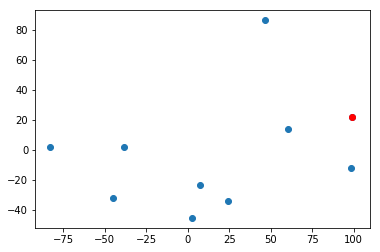

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
xs = list(np.random.uniform(-100, 100, 10))
ys = list(np.random.uniform(-100, 100, 10))
citys = list(zip(xs, ys))
x, y = citys.pop(random.choice([i for i in range(len(citys))]))
plt.scatter(xs, ys)
plt.scatter(x, y, c='red')

### ①全排列法
即穷举每种路径

In [18]:
import math

def perm(array):
    """路径全排列函数"""
    list_ = list(array)
    if len(list_) <= 1:
        yield list_
    else:
        for i in range(len(list_)):
            for item in perm(list_[:i] + list_[i+1:]):
                yield list_[i:i+1] + item

def calc_distance(array):
    """计算路线总距离 """
    distance = 0
    for i in range(1, len(array)):
        distance += math.sqrt((array[i - 1][0] - array[i][0])**2 + (array[i - 1][1] - array[i][1])**2)
    return distance

def get_best_path(array, x, y):
    """遍历所有路径，选出最短距离"""
    best_dis = 1e20
    for path_ in perm(citys):
        path = [(x, y)] + path_ + [(x, y)]
        dis = calc_distance(path)
        if best_dis > dis:
            best_dis = dis
            best_path = path
    return (best_dis, best_path)

In [19]:
%time best_path = get_best_path(citys, x, y)

Wall time: 4.28 s


In [20]:
best_path

(529.9276308550776,
 [(98.83051961858135, 21.755140227639956),
  (98.61244119328381, -12.065488599288116),
  (60.29052258847284, 13.600164198658902),
  (24.243896820862346, -34.36344255808392),
  (7.405253301203828, -23.588071808631213),
  (2.289628172914931, -45.37254166229749),
  (-45.21311070089587, -32.406322929773566),
  (-82.77238398252695, 2.106826129972106),
  (-38.164140373994115, 1.8087903537002887),
  (46.433567860604455, 86.33983103241204),
  (98.83051961858135, 21.755140227639956)])

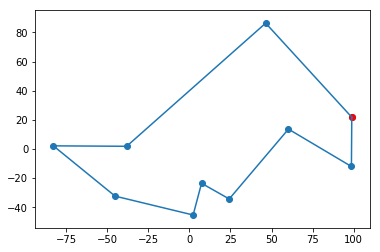

In [21]:
plt.plot(*np.array(best_path[1]).T)
plt.scatter(xs, ys)
plt.scatter(x, y, c='red')

此方法的计算时间复杂度为O(n!)，需要寻求更优秀的解法。